# Clusters
Este modulo contiene un conjunto de distintos ejemplos de clusterizaciones, nos sirve para mostrar el potencial de nbdev y como generar software de forma consistente. 

In [ ]:
#| default_exp Cluster_ejemplo

In [ ]:
#| hide
#| export
import warnings
warnings.filterwarnings('ignore')
from nbdev.showdoc import *
import matplotlib
import sklearn
import random 
import numpy as np
import shapely
#from libpysal.weights import Queen, KNN
from sklearn.cluster import DBSCAN, HDBSCAN, OPTICS, KMeans
import matplotlib.pyplot as plt

# Clase para generar puntos geométricos. 
Vamos hacer una clase para que contenga puntos y que sean ya geometrías. 

In [ ]:
#| export
class data_points:
    """Una clase que contiene a los datos"""
    def __init__(self, n, min_x = 0, min_y = 0, max_x= 1, max_y=1, seed= None):
        if seed != None:
            random.seed(seed)

        Xpoint = np.random.uniform(low= min_x, high= max_x, size=n)
        Ypoint = np.random.uniform(low= min_y, high= max_y, size=n)
        
        #self.Points = np.random.uniform(low= min_x, high= max_x, size=(n, 2))
        self.Points =  [shapely.Point(x[0],x[1]) for x in zip(Xpoint, Ypoint)]
    
    @classmethod
    def from_list(cls, list_points):
        """Se genera los datos usando una lista de puntos"""
        toto = cls(0)
        toto.Points = list_points
        return toto
    
    def get_points(self):
        """Una funcion que para obtener los puntos"""
        return self.Points

    def get_Multypoint(self):
        """Regresa un objeto MultiPoint con los puntos"""
        return shapely.geometry.MultiPoint(self.Points)
    
    def get_X(self):
        """Regresa las coordenadas X"""
        return [x.x for x in self.Points]

    def get_Y(self):
        """Regresa las coordenadas X"""
        return [x.y for x in self.Points]
    
    def centroid(self):
        """Regresa el centroide de los puntos """
        return shapely.centroid(self.get_Multypoint())
    
    def as_array(self):
        """Regresa los puntos como un array"""
        list_arrays = np.array([ (geom.xy[0][0], geom.xy[1][0]) for geom in self.Points])
        return list_arrays

    def add_points(self, data_points):
        """Agrega puntos de otra """
        self.Points = self.Points + data_points.Points
        return 
    
    

In [ ]:
#| hide
datos_simples = data_points(40)


In [ ]:
#| hide
datos_simples.get_points()

[<POINT (0.559 0.147)>,
 <POINT (0.731 0.481)>,
 <POINT (0.033 0.749)>,
 <POINT (0.087 0.234)>,
 <POINT (0.601 0.436)>,
 <POINT (0.369 0.379)>,
 <POINT (0.915 0.33)>,
 <POINT (0.71 0.438)>,
 <POINT (0.256 0.205)>,
 <POINT (0.955 0.94)>,
 <POINT (0.529 0.135)>,
 <POINT (0.998 0.765)>,
 <POINT (0.107 0.792)>,
 <POINT (0.772 0.861)>,
 <POINT (0.449 0.943)>,
 <POINT (0.059 0.841)>,
 <POINT (0.956 0.725)>,
 <POINT (0.906 0.604)>,
 <POINT (0.523 0.988)>,
 <POINT (0.411 0.108)>,
 <POINT (0.327 0.698)>,
 <POINT (0.133 0.03)>,
 <POINT (0.26 0.366)>,
 <POINT (0.159 0.955)>,
 <POINT (0.776 0.94)>,
 <POINT (0.967 0.058)>,
 <POINT (0.296 0.406)>,
 <POINT (0.959 0.619)>,
 <POINT (0.254 0.233)>,
 <POINT (0.571 0.405)>,
 <POINT (0.859 0.727)>,
 <POINT (0.098 0.754)>,
 <POINT (0.614 0.178)>,
 <POINT (0.951 0.619)>,
 <POINT (0.387 0.429)>,
 <POINT (0.987 0.118)>,
 <POINT (0.579 0.723)>,
 <POINT (0.439 0.16)>,
 <POINT (0.398 0.284)>,
 <POINT (0.277 0.194)>]

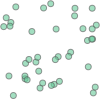

In [ ]:
#| hide
datos_simples.get_Multypoint()

In [ ]:
#| hide
datos_simples.get_X()

[0.5585987923100452,
 0.7309021335541557,
 0.032542784413361225,
 0.08716355142080923,
 0.6007179966399165,
 0.3685170243079806,
 0.9145391028926655,
 0.7100262996702668,
 0.2556049539144688,
 0.9554942157766281,
 0.5293368652351296,
 0.9981853346394661,
 0.10728459395439727,
 0.7720544133865764,
 0.44858291216267554,
 0.05858843805084313,
 0.9556274101828307,
 0.9058948986650488,
 0.5229755380236444,
 0.41140521345584435,
 0.3265138492632106,
 0.13324214984953175,
 0.2603588732351728,
 0.158599594631471,
 0.7757862685197582,
 0.9670505464132184,
 0.2959575636835221,
 0.9593721426410989,
 0.25369741902858456,
 0.5708796318505086,
 0.8588588124814804,
 0.09830087923496023,
 0.6135012266795327,
 0.9508761620724037,
 0.3868447793480797,
 0.9871875445219556,
 0.5791163123151113,
 0.4389446340581349,
 0.39791864242672825,
 0.2769811164689461]

In [ ]:
#| hide
#| output: false
datos_simples.get_Y()

[0.14690764646228915,
 0.48117409563057867,
 0.7485715205538995,
 0.23358128729296723,
 0.4355064442791916,
 0.3792806436703159,
 0.3295152575469824,
 0.43844350324391934,
 0.20517163505899094,
 0.9404620368648449,
 0.13543235628270034,
 0.7645352680198155,
 0.792078953532242,
 0.8610266362770672,
 0.9431196224339414,
 0.841239336928715,
 0.724868895908679,
 0.6040797768886882,
 0.9876724809859805,
 0.10818496522322352,
 0.697701361590196,
 0.030098828302776215,
 0.36577678638034106,
 0.9545585303653246,
 0.9400207046543687,
 0.057604424219525274,
 0.4064522392343989,
 0.6185098461790399,
 0.2332026071205796,
 0.40450749193502145,
 0.7270915938630541,
 0.7535388099361963,
 0.17779667364204244,
 0.6188035762667384,
 0.4291648765178193,
 0.11767333608335317,
 0.7232587445082108,
 0.1603660577690682,
 0.2841982268604383,
 0.19410114393901867]

In [ ]:
#| hide
if len(datos_simples.get_X()) != len(datos_simples.get_Y()):
    raise Exception("Si hay problema la evaluacion ")

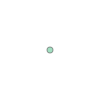

In [ ]:
#| hide
data_points(10).centroid()

In [ ]:
#| hide 
datos_simples.Points

[<POINT (0.559 0.147)>,
 <POINT (0.731 0.481)>,
 <POINT (0.033 0.749)>,
 <POINT (0.087 0.234)>,
 <POINT (0.601 0.436)>,
 <POINT (0.369 0.379)>,
 <POINT (0.915 0.33)>,
 <POINT (0.71 0.438)>,
 <POINT (0.256 0.205)>,
 <POINT (0.955 0.94)>,
 <POINT (0.529 0.135)>,
 <POINT (0.998 0.765)>,
 <POINT (0.107 0.792)>,
 <POINT (0.772 0.861)>,
 <POINT (0.449 0.943)>,
 <POINT (0.059 0.841)>,
 <POINT (0.956 0.725)>,
 <POINT (0.906 0.604)>,
 <POINT (0.523 0.988)>,
 <POINT (0.411 0.108)>,
 <POINT (0.327 0.698)>,
 <POINT (0.133 0.03)>,
 <POINT (0.26 0.366)>,
 <POINT (0.159 0.955)>,
 <POINT (0.776 0.94)>,
 <POINT (0.967 0.058)>,
 <POINT (0.296 0.406)>,
 <POINT (0.959 0.619)>,
 <POINT (0.254 0.233)>,
 <POINT (0.571 0.405)>,
 <POINT (0.859 0.727)>,
 <POINT (0.098 0.754)>,
 <POINT (0.614 0.178)>,
 <POINT (0.951 0.619)>,
 <POINT (0.387 0.429)>,
 <POINT (0.987 0.118)>,
 <POINT (0.579 0.723)>,
 <POINT (0.439 0.16)>,
 <POINT (0.398 0.284)>,
 <POINT (0.277 0.194)>]

# Clase clusters 

Nuestra clase va a usar los datos usando la clase de datos que construimos y vamos a hacer que genere los distintos tipos de clusters, los clusters se almacenaran como etiquetas dentro de la clase . 




In [ ]:
#| hide 
datos_simples = data_points(500, min_x = .75, min_y= .75, max_x= 1, max_y= 1 )

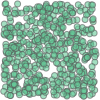

In [ ]:
#| hide
datos_simples.get_Multypoint()

In [ ]:
#| hide
def add_docu(function):
    """A decorator for changing the docstring"""
    def wrapper(*args, **kwargs):
        res = function(*args, **kwargs)
        res
        return res
    return wrapper
    

In [ ]:
#| export

class Clusters:
    """Clase para generar los clusters a partir de un objeto de la clase data_points
    
    Esta clase se utiliza para generar los distintos tipos de clusterizaciones, 
    se almacena los datos en una estructura de datos y se le añaden las respectivas 
    classes
    """
    
    def __init__(self, data_points_i, seed=1234):
        
        if seed != None:
            random.seed(seed)
        
        self.data_structure =  data_points_i
    
    def KMeans(self, **kwargs):
        """
        Se usa el algoritmo Kmeans para la obtencion de clusters, 
        las clases quedan almacenadas en .data_structure_classes_Kmeans.
        Si se desea obtener el modelo se tiene que añadir 
        (ret_model = True) como parámetro.
        """
        kmeans_c = KMeans(**kwargs)
        classes_val = kmeans_c.fit_predict(self.data_structure.as_array())
        self.data_structure.classes_Kmeans = classes_val
        
        if 'ret_model' in kwargs and kwargs['ret_model']==True :
            return  kmeans_c
        

    def DBSCAN(self, **kwargs):
        """
        Se DBSCAN para la obtencion de clusters, las clases quedan almacenadas
        en .data_structure_classes_DBSCAN. Si se desea obtener el modelo se tiene
        que añadir (ret_model = True) como parámetro."""
        db = DBSCAN(**kwargs).fit(self.data_structure.as_array())
        self.data_structure.classes_DBSCAN = db.labels_
        if 'ret_model' in kwargs and kwargs['ret_model']==True :
            return  db
    
    
    def HDBSCAN(self, **kwargs):
        """
        Se HDBSCAN para la obtencion de clusters, las clases quedan almacenadas
        en .data_structure_classes_HDBSCAN. Si se desea obtener el modelo se tiene
        que añadir (ret_model = True) como parámetro.
        """
        hdb = HDBSCAN(**kwargs).fit(self.data_structure.as_array())
        self.data_structure.classes_HDBSCAN = hdb.labels_
        if 'ret_model' in kwargs and kwargs['ret_model']==True : 
            return  hdb
        

    def OPTICS(self, **kwargs):
        """
        Se usa el algoritmo OPTICS para la obtencion de clusters, 
        las clases quedan almacenadas en .data_structure_classes_OPTICS.
        Si se desea obtener el modelo se tiene que añadir 
        (ret_model = True) como parámetro.
        """
        optics=  OPTICS(**kwargs).fit(self.data_structure.as_array())
        self.data_structure.classes_OPTICS = optics.labels_
        
        if 'ret_model' in kwargs and kwargs['ret_model']==True :
            return  optics
        


In [ ]:
show_doc(Clusters)

---

### Clusters

>      Clusters (data_points_i, seed=1234)

Clase para generar los clusters a partir de un objeto de la clase data_points

Esta clase se utiliza para generar los distintos tipos de clusterizaciones, 
se almacena los datos en una estructura de datos y se le añaden las respectivas 
classes

In [ ]:
show_doc(Clusters.KMeans)

---

### Clusters.KMeans

>      Clusters.KMeans (**kwargs)

Se usa el algoritmo Kmeans para la obtencion de clusters, 
las clases quedan almacenadas en .data_structure_classes_Kmeans.
Si se desea obtener el modelo se tiene que añadir 
(ret_model = True) como parámetro.

Al ser posible añadir más cosas dentro de la documentación entonces podemos añadir la documentación de las funciones que se utilizan dentro de la clase. Como en este caso añadimos la documentación de [KMEANS](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) para ver los parametros que se pueden pasar a la función. 

In [ ]:
show_doc(KMeans)

---

### KMeans

>      KMeans (n_clusters=8, init='k-means++', n_init='auto', max_iter=300,
>              tol=0.0001, verbose=0, random_state=None, copy_x=True,
>              algorithm='lloyd')

K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| n_clusters | int | 8 | The number of clusters to form as well as the number of<br>centroids to generate.<br><br>For an example of how to choose an optimal value for `n_clusters` refer to<br>:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`. |
| init | str | k-means++ | Method for initialization:<br><br>* 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to the overall inertia. This technique speeds up             convergence. The algorithm implemented is "greedy k-means++". It             differs from the vanilla k-means++ by making several trials at             each sampling step and choosing the best centroid among them.<br><br>* 'random': choose `n_clusters` observations (rows) at random from         data for the initial centroids.<br><br>* If an array is passed, it should be of shape (n_clusters, n_features)        and gives the initial centers.<br><br>* If a callable is passed, it should take arguments X, n_clusters and a        random state and return an initialization.<br><br>For an example of how to use the different `init` strategy, see the example<br>entitled :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`. |
| n_init | str | auto | Number of times the k-means algorithm is run with different centroid<br>seeds. The final results is the best output of `n_init` consecutive runs<br>in terms of inertia. Several runs are recommended for sparse<br>high-dimensional problems (see :ref:`kmeans_sparse_high_dim`).<br><br>When `n_init='auto'`, the number of runs depends on the value of init:<br>10 if using `init='random'` or `init` is a callable;<br>1 if using `init='k-means++'` or `init` is an array-like.<br><br>.. versionadded:: 1.2<br>   Added 'auto' option for `n_init`.<br><br>.. versionchanged:: 1.4<br>   Default value for `n_init` changed to `'auto'`. |
| max_iter | int | 300 | Maximum number of iterations of the k-means algorithm for a<br>single run. |
| tol | float | 0.0001 | Relative tolerance with regards to Frobenius norm of the difference<br>in the cluster centers of two consecutive iterations to declare<br>convergence. |
| verbose | int | 0 | Verbosity mode. |
| random_state | NoneType | None | Determines random number generation for centroid initialization. Use<br>an int to make the randomness deterministic.<br>See :term:`Glossary <random_state>`. |
| copy_x | bool | True | When pre-computing distances it is more numerically accurate to center<br>the data first. If copy_x is True (default), then the original data is<br>not modified. If False, the original data is modified, and put back<br>before the function returns, but small numerical differences may be<br>introduced by subtracting and then adding the data mean. Note that if<br>the original data is not C-contiguous, a copy will be made even if<br>copy_x is False. If the original data is sparse, but not in CSR format,<br>a copy will be made even if copy_x is False. |
| algorithm | str | lloyd | K-means algorithm to use. The classical EM-style algorithm is `"lloyd"`.<br>The `"elkan"` variation can be more efficient on some datasets with<br>well-defined clusters, by using the triangle inequality. However it's<br>more memory intensive due to the allocation of an extra array of shape<br>`(n_samples, n_clusters)`.<br><br>.. versionchanged:: 0.18<br>    Added Elkan algorithm<br><br>.. versionchanged:: 1.1<br>    Renamed "full" to "lloyd", and deprecated "auto" and "full".<br>    Changed "auto" to use "lloyd" instead of "elkan". |

De igual forma hacemos lo mismo con la documentación de [DBSCAN], [HDBSCAN] y [OPTICS]

In [ ]:
show_doc(Clusters.DBSCAN)

---

### Clusters.DBSCAN

>      Clusters.DBSCAN (**kwargs)

Se DBSCAN para la obtencion de clusters, las clases quedan almacenadas
en .data_structure_classes_DBSCAN. Si se desea obtener el modelo se tiene
que añadir (ret_model = True) como parámetro.

In [ ]:
#show_doc(DBSCAN)

---

### DBSCAN

>      DBSCAN (eps=0.5, min_samples=5, metric='euclidean', metric_params=None,
>              algorithm='auto', leaf_size=30, p=None, n_jobs=None)

Perform DBSCAN clustering from vector array or distance matrix.

DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
Finds core samples of high density and expands clusters from them.
Good for data which contains clusters of similar density.

The worst case memory complexity of DBSCAN is :math:`O({n}^2)`, which can
occur when the `eps` param is large and `min_samples` is low.

Read more in the :ref:`User Guide <dbscan>`.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| eps | float | 0.5 | The maximum distance between two samples for one to be considered<br>as in the neighborhood of the other. This is not a maximum bound<br>on the distances of points within a cluster. This is the most<br>important DBSCAN parameter to choose appropriately for your data set<br>and distance function. |
| min_samples | int | 5 | The number of samples (or total weight) in a neighborhood for a point to<br>be considered as a core point. This includes the point itself. If<br>`min_samples` is set to a higher value, DBSCAN will find denser clusters,<br>whereas if it is set to a lower value, the found clusters will be more<br>sparse. |
| metric | str | euclidean | The metric to use when calculating distance between instances in a<br>feature array. If metric is a string or callable, it must be one of<br>the options allowed by :func:`sklearn.metrics.pairwise_distances` for<br>its metric parameter.<br>If metric is "precomputed", X is assumed to be a distance matrix and<br>must be square. X may be a :term:`sparse graph`, in which<br>case only "nonzero" elements may be considered neighbors for DBSCAN.<br><br>.. versionadded:: 0.17<br>   metric *precomputed* to accept precomputed sparse matrix. |
| metric_params | NoneType | None | Additional keyword arguments for the metric function.<br><br>.. versionadded:: 0.19 |
| algorithm | str | auto | The algorithm to be used by the NearestNeighbors module<br>to compute pointwise distances and find nearest neighbors.<br>See NearestNeighbors module documentation for details. |
| leaf_size | int | 30 | Leaf size passed to BallTree or cKDTree. This can affect the speed<br>of the construction and query, as well as the memory required<br>to store the tree. The optimal value depends<br>on the nature of the problem. |
| p | NoneType | None | The power of the Minkowski metric to be used to calculate distance<br>between points. If None, then ``p=2`` (equivalent to the Euclidean<br>distance). |
| n_jobs | NoneType | None | The number of parallel jobs to run.<br>``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.<br>``-1`` means using all processors. See :term:`Glossary <n_jobs>`<br>for more details. |

In [ ]:
show_doc(Clusters.HDBSCAN)

---

### Clusters.HDBSCAN

>      Clusters.HDBSCAN (**kwargs)

Se HDBSCAN para la obtencion de clusters, las clases quedan almacenadas
en .data_structure_classes_HDBSCAN. Si se desea obtener el modelo se tiene
que añadir (ret_model = True) como parámetro.

In [ ]:
show_doc(HDBSCAN)

---

### HDBSCAN

>      HDBSCAN (min_cluster_size=5, min_samples=None,
>               cluster_selection_epsilon=0.0, max_cluster_size=None,
>               metric='euclidean', metric_params=None, alpha=1.0,
>               algorithm='auto', leaf_size=40, n_jobs=None,
>               cluster_selection_method='eom', allow_single_cluster=False,
>               store_centers=None, copy=False)

Cluster data using hierarchical density-based clustering.

HDBSCAN - Hierarchical Density-Based Spatial Clustering of Applications
with Noise. Performs :class:`~sklearn.cluster.DBSCAN` over varying epsilon
values and integrates the result to find a clustering that gives the best
stability over epsilon.
This allows HDBSCAN to find clusters of varying densities (unlike
:class:`~sklearn.cluster.DBSCAN`), and be more robust to parameter selection.
Read more in the :ref:`User Guide <hdbscan>`.

For an example of how to use HDBSCAN, as well as a comparison to
:class:`~sklearn.cluster.DBSCAN`, please see the :ref:`plotting demo
<sphx_glr_auto_examples_cluster_plot_hdbscan.py>`.

.. versionadded:: 1.3

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| min_cluster_size | int | 5 | The minimum number of samples in a group for that group to be<br>considered a cluster; groupings smaller than this size will be left<br>as noise. |
| min_samples | NoneType | None | The number of samples in a neighborhood for a point<br>to be considered as a core point. This includes the point itself.<br>When `None`, defaults to `min_cluster_size`. |
| cluster_selection_epsilon | float | 0.0 | A distance threshold. Clusters below this value will be merged.<br>See [5]_ for more information. |
| max_cluster_size | NoneType | None | A limit to the size of clusters returned by the `"eom"` cluster<br>selection algorithm. There is no limit when `max_cluster_size=None`.<br>Has no effect if `cluster_selection_method="leaf"`. |
| metric | str | euclidean | The metric to use when calculating distance between instances in a<br>feature array.<br><br>- If metric is a string or callable, it must be one of<br>  the options allowed by :func:`~sklearn.metrics.pairwise_distances`<br>  for its metric parameter.<br><br>- If metric is "precomputed", X is assumed to be a distance matrix and<br>  must be square. |
| metric_params | NoneType | None | Arguments passed to the distance metric. |
| alpha | float | 1.0 | A distance scaling parameter as used in robust single linkage.<br>See [3]_ for more information. |
| algorithm | str | auto | Exactly which algorithm to use for computing core distances; By default<br>this is set to `"auto"` which attempts to use a<br>:class:`~sklearn.neighbors.KDTree` tree if possible, otherwise it uses<br>a :class:`~sklearn.neighbors.BallTree` tree. Both `"kd_tree"` and<br>`"ball_tree"` algorithms use the<br>:class:`~sklearn.neighbors.NearestNeighbors` estimator.<br><br>If the `X` passed during `fit` is sparse or `metric` is invalid for<br>both :class:`~sklearn.neighbors.KDTree` and<br>:class:`~sklearn.neighbors.BallTree`, then it resolves to use the<br>`"brute"` algorithm.<br><br>.. deprecated:: 1.4<br>   The `'kdtree'` option was deprecated in version 1.4,<br>   and will be renamed to `'kd_tree'` in 1.6.<br><br>.. deprecated:: 1.4<br>   The `'balltree'` option was deprecated in version 1.4,<br>   and will be renamed to `'ball_tree'` in 1.6. |
| leaf_size | int | 40 | Leaf size for trees responsible for fast nearest neighbour queries when<br>a KDTree or a BallTree are used as core-distance algorithms. A large<br>dataset size and small `leaf_size` may induce excessive memory usage.<br>If you are running out of memory consider increasing the `leaf_size`<br>parameter. Ignored for `algorithm="brute"`. |
| n_jobs | NoneType | None | Number of jobs to run in parallel to calculate distances.<br>`None` means 1 unless in a :obj:`joblib.parallel_backend` context.<br>`-1` means using all processors. See :term:`Glossary <n_jobs>`<br>for more details. |
| cluster_selection_method | str | eom | The method used to select clusters from the condensed tree. The<br>standard approach for HDBSCAN* is to use an Excess of Mass (`"eom"`)<br>algorithm to find the most persistent clusters. Alternatively you can<br>instead select the clusters at the leaves of the tree -- this provides<br>the most fine grained and homogeneous clusters. |
| allow_single_cluster | bool | False | By default HDBSCAN* will not produce a single cluster, setting this<br>to True will override this and allow single cluster results in<br>the case that you feel this is a valid result for your dataset. |
| store_centers | NoneType | None | Which, if any, cluster centers to compute and store. The options are:<br><br>- `None` which does not compute nor store any centers.<br>- `"centroid"` which calculates the center by taking the weighted<br>  average of their positions. Note that the algorithm uses the<br>  euclidean metric and does not guarantee that the output will be<br>  an observed data point.<br>- `"medoid"` which calculates the center by taking the point in the<br>  fitted data which minimizes the distance to all other points in<br>  the cluster. This is slower than "centroid" since it requires<br>  computing additional pairwise distances between points of the<br>  same cluster but guarantees the output is an observed data point.<br>  The medoid is also well-defined for arbitrary metrics, and does not<br>  depend on a euclidean metric.<br>- `"both"` which computes and stores both forms of centers. |
| copy | bool | False | If `copy=True` then any time an in-place modifications would be made<br>that would overwrite data passed to :term:`fit`, a copy will first be<br>made, guaranteeing that the original data will be unchanged.<br>Currently, it only applies when `metric="precomputed"`, when passing<br>a dense array or a CSR sparse matrix and when `algorithm="brute"`. |

In [ ]:
show_doc(Clusters.OPTICS)

---

### Clusters.OPTICS

>      Clusters.OPTICS (**kwargs)

Se usa el algoritmo OPTICS para la obtencion de clusters, 
las clases quedan almacenadas en .data_structure_classes_OPTICS.
Si se desea obtener el modelo se tiene que añadir 
(ret_model = True) como parámetro.

In [ ]:
show_doc(OPTICS)

---

### OPTICS

>      OPTICS (min_samples=5, max_eps=inf, metric='minkowski', p=2,
>              metric_params=None, cluster_method='xi', eps=None, xi=0.05,
>              predecessor_correction=True, min_cluster_size=None,
>              algorithm='auto', leaf_size=30, memory=None, n_jobs=None)

Estimate clustering structure from vector array.

OPTICS (Ordering Points To Identify the Clustering Structure), closely
related to DBSCAN, finds core sample of high density and expands clusters
from them [1]_. Unlike DBSCAN, keeps cluster hierarchy for a variable
neighborhood radius. Better suited for usage on large datasets than the
current sklearn implementation of DBSCAN.

Clusters are then extracted using a DBSCAN-like method
(cluster_method = 'dbscan') or an automatic
technique proposed in [1]_ (cluster_method = 'xi').

This implementation deviates from the original OPTICS by first performing
k-nearest-neighborhood searches on all points to identify core sizes, then
computing only the distances to unprocessed points when constructing the
cluster order. Note that we do not employ a heap to manage the expansion
candidates, so the time complexity will be O(n^2).

Read more in the :ref:`User Guide <optics>`.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| min_samples | int | 5 | The number of samples in a neighborhood for a point to be considered as<br>a core point. Also, up and down steep regions can't have more than<br>``min_samples`` consecutive non-steep points. Expressed as an absolute<br>number or a fraction of the number of samples (rounded to be at least<br>2). |
| max_eps | float | inf | The maximum distance between two samples for one to be considered as<br>in the neighborhood of the other. Default value of ``np.inf`` will<br>identify clusters across all scales; reducing ``max_eps`` will result<br>in shorter run times. |
| metric | str | minkowski | Metric to use for distance computation. Any metric from scikit-learn<br>or scipy.spatial.distance can be used.<br><br>If metric is a callable function, it is called on each<br>pair of instances (rows) and the resulting value recorded. The callable<br>should take two arrays as input and return one value indicating the<br>distance between them. This works for Scipy's metrics, but is less<br>efficient than passing the metric name as a string. If metric is<br>"precomputed", `X` is assumed to be a distance matrix and must be<br>square.<br><br>Valid values for metric are:<br><br>- from scikit-learn: ['cityblock', 'cosine', 'euclidean', 'l1', 'l2',<br>  'manhattan']<br><br>- from scipy.spatial.distance: ['braycurtis', 'canberra', 'chebyshev',<br>  'correlation', 'dice', 'hamming', 'jaccard', 'kulsinski',<br>  'mahalanobis', 'minkowski', 'rogerstanimoto', 'russellrao',<br>  'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean',<br>  'yule']<br><br>Sparse matrices are only supported by scikit-learn metrics.<br>See the documentation for scipy.spatial.distance for details on these<br>metrics.<br><br>.. note::<br>   `'kulsinski'` is deprecated from SciPy 1.9 and will removed in SciPy 1.11. |
| p | int | 2 | Parameter for the Minkowski metric from<br>:class:`~sklearn.metrics.pairwise_distances`. When p = 1, this is<br>equivalent to using manhattan_distance (l1), and euclidean_distance<br>(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used. |
| metric_params | NoneType | None | Additional keyword arguments for the metric function. |
| cluster_method | str | xi | The extraction method used to extract clusters using the calculated<br>reachability and ordering. Possible values are "xi" and "dbscan". |
| eps | NoneType | None | The maximum distance between two samples for one to be considered as<br>in the neighborhood of the other. By default it assumes the same value<br>as ``max_eps``.<br>Used only when ``cluster_method='dbscan'``. |
| xi | float | 0.05 | Determines the minimum steepness on the reachability plot that<br>constitutes a cluster boundary. For example, an upwards point in the<br>reachability plot is defined by the ratio from one point to its<br>successor being at most 1-xi.<br>Used only when ``cluster_method='xi'``. |
| predecessor_correction | bool | True | Correct clusters according to the predecessors calculated by OPTICS<br>[2]_. This parameter has minimal effect on most datasets.<br>Used only when ``cluster_method='xi'``. |
| min_cluster_size | NoneType | None | Minimum number of samples in an OPTICS cluster, expressed as an<br>absolute number or a fraction of the number of samples (rounded to be<br>at least 2). If ``None``, the value of ``min_samples`` is used instead.<br>Used only when ``cluster_method='xi'``. |
| algorithm | str | auto | Algorithm used to compute the nearest neighbors:<br><br>- 'ball_tree' will use :class:`~sklearn.neighbors.BallTree`.<br>- 'kd_tree' will use :class:`~sklearn.neighbors.KDTree`.<br>- 'brute' will use a brute-force search.<br>- 'auto' (default) will attempt to decide the most appropriate<br>  algorithm based on the values passed to :meth:`fit` method.<br><br>Note: fitting on sparse input will override the setting of<br>this parameter, using brute force. |
| leaf_size | int | 30 | Leaf size passed to :class:`~sklearn.neighbors.BallTree` or<br>:class:`~sklearn.neighbors.KDTree`. This can affect the speed of the<br>construction and query, as well as the memory required to store the<br>tree. The optimal value depends on the nature of the problem. |
| memory | NoneType | None | Used to cache the output of the computation of the tree.<br>By default, no caching is done. If a string is given, it is the<br>path to the caching directory. |
| n_jobs | NoneType | None | The number of parallel jobs to run for neighbors search.<br>``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.<br>``-1`` means using all processors. See :term:`Glossary <n_jobs>`<br>for more details. |

In [ ]:
show_doc(Clusters.OPTICS)

---

### Clusters.OPTICS

>      Clusters.OPTICS (**kwargs)

Se usa el algoritmo OPTICS para la obtencion de clusters, 
las clases quedan almacenadas en .data_structure_classes_OPTICS.
Si se desea obtener el modelo se tiene que añadir 
(ret_model = True) como parámetro.

In [ ]:
#| hide 
cluster_all  = Clusters(datos_simples)
cluster_all.KMeans()

In [ ]:
#| hide
cluster_all.data_structure.classes_Kmeans

array([2, 6, 5, 1, 0, 2, 2, 0, 3, 1, 0, 3, 6, 0, 0, 7, 3, 5, 1, 4, 7, 5,
       0, 6, 2, 3, 4, 1, 7, 4, 2, 1, 5, 2, 2, 5, 5, 0, 7, 1, 0, 4, 6, 5,
       2, 1, 7, 3, 1, 7, 3, 6, 5, 0, 0, 1, 0, 2, 7, 7, 2, 5, 2, 4, 1, 2,
       5, 6, 4, 6, 6, 3, 7, 1, 5, 6, 7, 5, 0, 2, 7, 6, 2, 5, 4, 5, 3, 1,
       0, 2, 6, 5, 4, 4, 1, 1, 5, 4, 1, 0, 1, 7, 7, 5, 6, 0, 0, 6, 7, 2,
       2, 3, 6, 2, 7, 0, 1, 7, 1, 4, 0, 0, 1, 7, 2, 2, 1, 0, 4, 7, 0, 4,
       2, 0, 3, 4, 2, 5, 3, 6, 6, 1, 5, 2, 2, 3, 0, 2, 1, 2, 4, 0, 3, 3,
       4, 7, 6, 5, 7, 1, 3, 6, 4, 5, 2, 3, 1, 2, 2, 2, 5, 5, 6, 7, 7, 0,
       2, 6, 3, 7, 1, 1, 3, 7, 4, 1, 1, 5, 1, 4, 6, 2, 6, 6, 0, 3, 0, 7,
       4, 0, 0, 2, 2, 6, 1, 0, 3, 0, 5, 3, 2, 4, 0, 3, 2, 7, 7, 1, 0, 4,
       0, 1, 6, 0, 3, 0, 4, 0, 2, 0, 3, 6, 2, 1, 7, 4, 4, 5, 5, 1, 2, 0,
       4, 7, 7, 0, 2, 1, 4, 5, 2, 0, 1, 0, 7, 1, 4, 0, 1, 2, 2, 4, 2, 7,
       0, 1, 3, 3, 2, 2, 4, 2, 7, 3, 6, 1, 2, 2, 5, 5, 4, 1, 5, 1, 2, 0,
       3, 1, 4, 5, 3, 6, 2, 0, 2, 2, 5, 7, 4, 7, 0,

In [ ]:
#| hide 
cluster_all.DBSCAN(eps=0.01, min_samples=10)

In [ ]:
#| hide
cluster_all.data_structure.classes_DBSCAN

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [ ]:
#| hide
cluster_all.HDBSCAN()

In [ ]:
#| hide
cluster_all.data_structure.classes_DBSCAN

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [ ]:
#| hide
cluster_all.OPTICS()

In [ ]:
#| hide
cluster_all.data_structure.classes_OPTICS

array([-1, 17,  7,  6, -1, -1, -1, 12, 22, -1, 19, 22, 19, 12, -1, 30, -1,
       -1,  6, 13, 27, 33, 16, -1, -1, -1, 14, -1, 25, 14,  1, -1, -1,  0,
       -1,  8, -1, 12, -1, 32, 12, 13, -1,  7, -1,  4, 26, 21, -1, 26, 29,
       -1, 33, 12, -1, -1, -1, -1, 27, 30,  0,  8, -1, 14,  6, -1,  7, 20,
       13, 20, -1, -1, -1,  4, 33, -1, 30,  7, 15, -1, -1, 18,  1,  5, -1,
        8, -1, -1, 15,  9, 20,  5, -1, -1, 31, 32, -1, 14, 23, 15, 31, 26,
       -1, -1, -1, -1, 11, 17, 27, -1, -1, 21, -1,  1, 27, -1, -1, 30, -1,
       -1, -1, -1, 31, 30, -1,  3, 24, -1, -1, -1, -1, -1,  1, -1, 29, -1,
        1, -1, -1, -1, 17, -1, -1,  9,  2, -1, 19, -1, 32,  2, -1, 15, 29,
       21, 13, 30, 16, -1, -1, -1, -1, 17, 34, -1,  2, 21, -1,  0, -1,  3,
       33, 33, 18, 28, 26, -1, -1, 16, 12, 27,  6, -1, 29, 25, 34, 23, 31,
        7, -1, 34, 20,  0, 18, 16, 10, 22, -1, 25, -1, 19, -1, -1, -1, -1,
       -1, 19, 29, 12, -1, -1, -1, -1, -1, 29, -1, 28, 26, 32, -1, -1, 10,
       -1, -1, 15, 21, 12

# Ejemplo uso clusterizaciones 

Creamos un conjunto de datos usando los distintos metodos en las clases que ya hicimos. 

In [ ]:
datos_simples_3 = data_points(500, min_x = 0.6, min_y= 0.6, max_x= 1.0, max_y= 1.0 )
datos_simples_2 = data_points(500, min_x = 0.0, min_y= 0.6, max_x= 0.4, max_y= 1.0 )
datos_simples_1 = data_points(500, min_x = 0.6, min_y= 0.0, max_x= 1.0, max_y= 0.4 )
datos_simples_0 = data_points(500, min_x = 0.0, min_y= 0.0, max_x= 0.4, max_y= 0.4 )

Añadios los puntos en un sólo objeto

In [ ]:
datos_simples_0.add_points(datos_simples_1)
datos_simples_0.add_points(datos_simples_2)
datos_simples_0.add_points(datos_simples_3)


Veamos los puntos en el objeto `datos_simples_0`

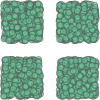

In [ ]:
datos_simples_0.get_Multypoint()

Usando nuestro objeto de la clase `data_points` con los datos (`datos_simple_0`) vamos a generar nuestro objeto de la clase `Clusters` y obtener las distintas clusteraciones.   

In [ ]:
cluster_all  = Clusters(datos_simples_0)

In [ ]:
cluster_all.OPTICS()
cluster_all.HDBSCAN()
cluster_all.DBSCAN(eps=0.1, min_samples=10)
cluster_all.KMeans()

Veamos que los untos se encuentran dentor del objeto. 

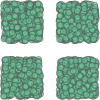

In [ ]:
cluster_all.data_structure.get_Multypoint()

## Hagamos la visualización de los clusters 

Usando nuestro objeto `cluster_all` y las clases 

<matplotlib.collections.PathCollection>

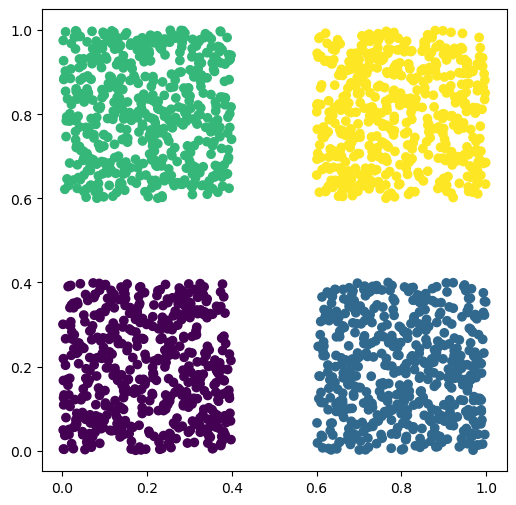

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
color_map = matplotlib.colormaps['viridis'].resampled(len(np.unique(cluster_all.data_structure.classes_DBSCAN)))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(np.unique(cluster_all.data_structure.classes_DBSCAN)))]
plt.scatter(
        cluster_all.data_structure.get_X(),
        cluster_all.data_structure.get_Y(),
        c = cluster_all.data_structure.classes_DBSCAN
        #s = cluster_all.data_structure.classes_DBSCAN,
        #c= colors()
    )

<matplotlib.collections.PathCollection>

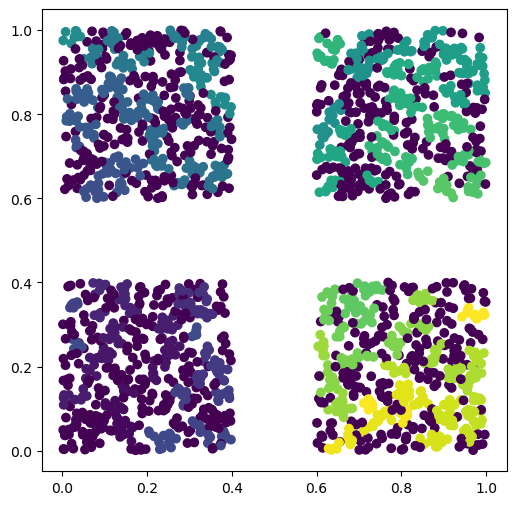

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(
        cluster_all.data_structure.get_X(),
        cluster_all.data_structure.get_Y(),
        c = cluster_all.data_structure.classes_OPTICS
        #s = cluster_all.data_structure.classes_DBSCAN,
        #c= colors()
    )

<matplotlib.collections.PathCollection>

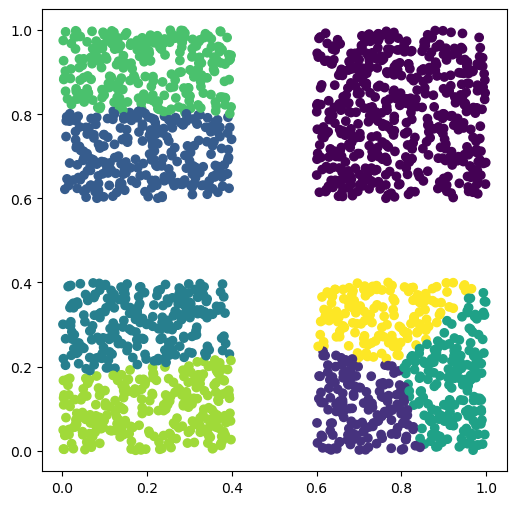

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(
        cluster_all.data_structure.get_X(),
        cluster_all.data_structure.get_Y(),
        c = cluster_all.data_structure.classes_Kmeans
        #s = cluster_all.data_structure.classes_DBSCAN,
        #c= colors()
    )

<matplotlib.collections.PathCollection>

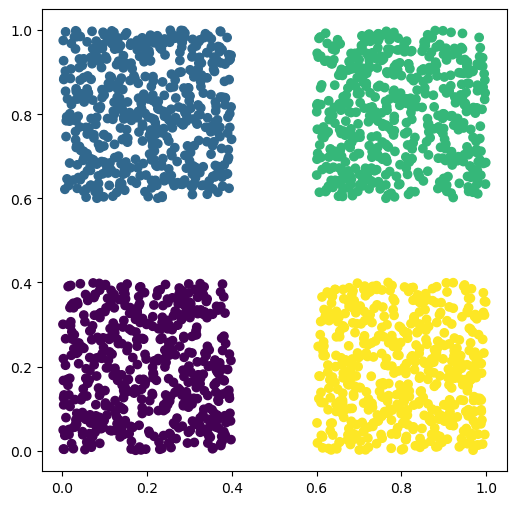

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(
        cluster_all.data_structure.get_X(),
        cluster_all.data_structure.get_Y(),
        c = cluster_all.data_structure.classes_HDBSCAN
        #s = cluster_all.data_structure.classes_DBSCAN,
        #c= colors()
    )

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()